In [2]:
#hide
from fastrl.core import *

# fastrl

> A Concise introduction to key ideas in RL.

## Install

`pip install fastrl`

## How to use

The following notes is targeted at people interested in Reinforcement Learning looking to get upto speed  without sacfricing on rigor.The necessary math is tackled but with computation first approach.Basic ability to write and understand simple programs and high school level math is all that is required.For readers looking to understand the latest developments in this field refer amazing [Spinning Up RL](https://spinningup.openai.com/en/latest/)


### Suggestions :

While reading the text reader should constantly be asking two questions :


How can I implement this ? : 

`Brings practical computational problems into the picture and ensures actual understanding.`

How can I be sure what I'm doing will work(If implemented correctly) ? : 

`As we will see RL needs lot of tricks and hacks to make it work. Whenever some notation and math help us in choosing sensible things,we should do it. This is where the rigor part of this notes comes into picture.This will be essential in removing the magic out of many **SOTA** algorithms in RL.`

## Introduction

Let's start with humans learning from experiance.Say we are trying to learn to bicycle. We are driven by a goal to `stay balanced and pedal`.Along the way we fall.Now we need to start again.Somewhere in the gap between each iteration,we are learning and improving.Let's hash out the features of this process,if we are to model this :

1. **Past actions influence future output**: There is no immediate feedback.Each micro-action(exerting more pressure on the pedal,..) along the way either leads to falling-off balance or keep moving.


 `Computational Problem` : How to assign credit to actions when they are not temporally connected ?
 
 

2. **Outcomes might not be deterministic**: There are features of the environment(road,weather etc) that we do not fully understand that can effect outcome of the action.

`Computational Problem`: How to make inference about the properties of a system under uncertainity ?



Since out of the above two the latter seems to be simpler,let's  start by building our intuition about Non-deterministic systems :
Let's say we are given a Non-deterministic system whose properties we are unaware of.How can we build our knowledge about the properties of this system ?Can we come up with a systematic way(algorithm) to estimate it's behaviour ?

In [38]:
#hide
import matplotlib.pyplot as plt
import torch
def query(): return torch.randn(1).item()*10



In [39]:
query(),query(),query() #Fires different measurements each time.

(12.723662853240967, 3.924424648284912, -14.150433540344238)


Now let's measure a **property** of this system...say it's **mean**:


1. How will your estimate of this mean change with each query ? 


2. How does your confidence on this mean change with increasing number of queries $n$ ?

In [29]:
def estimate_mean(n):
    """Returns list of estimated means after each query repeated for n times."""
    list_n = [] # keep track of all the outputs from our slot machine
    list_mean = [] # collect the means after every sample.
    for i in range(n):
        out = query()
        list_n.append(out)
        list_mean.append(sum(list_n)/len(list_n))
    return list_mean   

In [30]:
estimate_mean(10) # The list of estimates for n = 1...10

[-2.5786030292510986,
 -4.730186462402344,
 -7.520177364349365,
 -7.9081882536411285,
 -8.29500961303711,
 -7.210639541347821,
 -7.688306761639459,
 -10.171684343367815,
 -9.197203450732761,
 -8.182818531990051]

(array([ 1.,  1.,  0.,  0.,  0.,  1.,  0.,  1., 12., 84.]),
 array([-16.37986064, -14.62730181, -12.87474298, -11.12218415,
         -9.36962532,  -7.61706649,  -5.86450766,  -4.11194883,
         -2.35939   ,  -0.60683117,   1.14572766]),
 <a list of 10 Patch objects>)

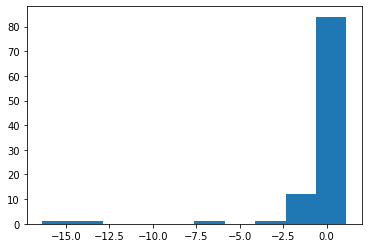

In [35]:
#let's plot these means
list_means = estimate_mean(100)
plt.hist(list_means)

We can see that the calculated mean vary a lot but seem to be closer to $0$ most often..But how does our estimate itself depend on $n$(number of queries) ?

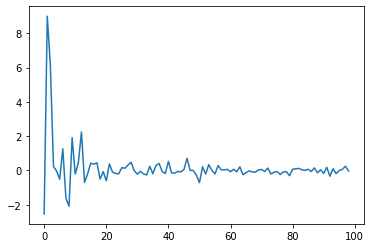

In [36]:
#let's measure the stability of our estimates by taking the difference of each successive estimates.

diff_means = [list_means[i]-list_means[i-1] for i in range(1,len(list_means))]
plt.plot(diff_means)


Our estimate of the mean don't seem to change much after a while.This is interesting.This aligns with our intuition - with more samples, we can be more confident.We can even go about proclaiming that whatever the dynamics of the system it's mean might be constant ?